In [1]:
from utils import conf_ini, time_step, calc_energy, verlet_list, plot_energy_over_time
import numpy as np


In [2]:
L = 4
N = L * L

# density
rho = 0.6
# box size length
boxsize = np.sqrt(N / rho)

temper = 1.05

# Lennard-Jones cut radius
rcut = boxsize / 3
rcut = rcut**2

# Verlet list radius
rv = boxsize / 2.5
rv = rv**2

# Parameters of the lennard-jones potential
depth = 1
part_size = 1
mass = 1

# max simulation time (n of steps * dt)
t_max = 0.1  # 5


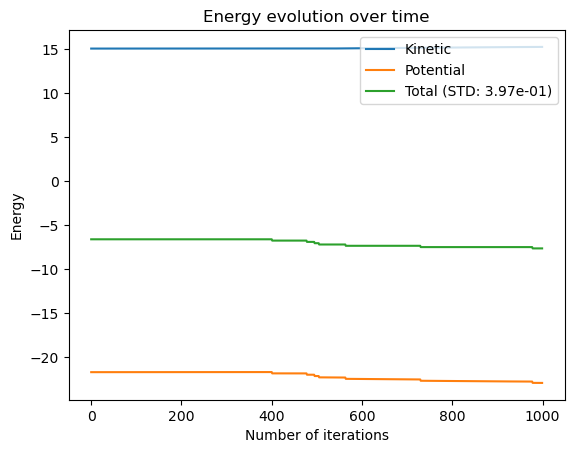

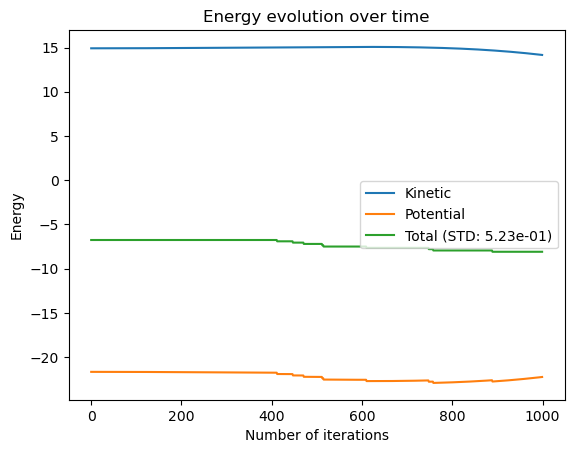

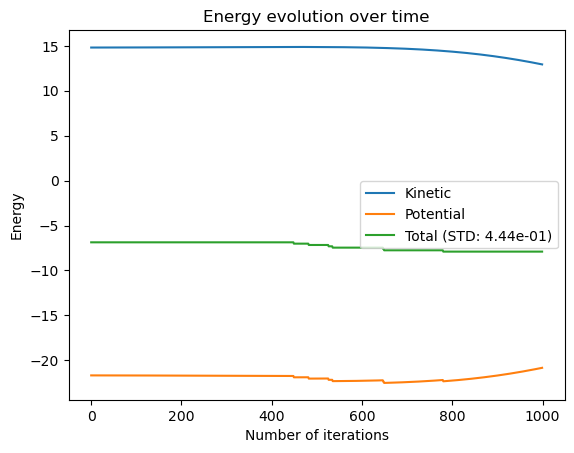

In [3]:
# time step sizes
dts = [10**-4, 10**-4, 10**-4]  # [10**-4, 10**-5, 10**-6]

# run the simulation for each time step size
for dt in dts:
    ref_state = conf_ini(N, boxsize, temper)
    nviz, viz = verlet_list(ref_state, rv, boxsize)

    kin_energy_over_time = []
    pot_energy_over_time = []
    total_over_time = []

    iterations = int(t_max / dt)

    for _ in range(iterations):
        ref_state, nviz, viz = time_step(
            ref_state, nviz, viz, dt, boxsize, N, rv, rcut, part_size, depth, mass
        )

        kin, pot, total = calc_energy(ref_state, N, mass)
        kin_energy_over_time.append(kin)
        pot_energy_over_time.append(pot)
        total_over_time.append(total)

    plot_energy_over_time(kin_energy_over_time, pot_energy_over_time, total_over_time)
